In [175]:
import numpy as np
import pandas as pd

In [176]:
X = np.array([[1, 2, 3, 11, 12, 13, 15], [3, 4, 5, 13, 14, 15, 18], [1, 1, 1, 1, 1, 1, 1]])
y = [0, 0, 0, 1, 1, 1, 1]

In [177]:
X = X.T

In [178]:
X[0]

array([1, 3, 1])

In [179]:
a = np.array([[1, 2, 3, 11, 12, 13, 15], [3, 4, 5, 13, 14, 15, 18]])
b = np.array([1, 1, 1]).reshape(1, 3)

In [181]:
a = a.T

In [183]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def h_theta(x, theta):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [184]:
z = np.zeros((1, 3))
(z - [0.0, 0.0, 0.0]).dtype

dtype('float64')

In [203]:
np.zeros(3) - [1, 2, 4]

array([-1., -2., -4.])

In [228]:
def gradient_descent(epochs, alpha, m, n):
    theta_vector = np.zeros(3)
    for k in range(0, epochs):
        temp_1 = alpha * (1/m) * sum([(h_theta(X[i], theta_vector) - y[i]) for i in range(0, m)]) * X[i][0]
        temp_2 = alpha * (1/m) * sum([(h_theta(X[i], theta_vector) - y[i]) for i in range(0, m)]) * X[i][1]
        temp_3 = alpha * (1/m) * sum([(h_theta(X[i], theta_vector) - y[i]) for i in range(0, m)]) * X[i][2]
        theta_vector = theta_vector - [temp_1, temp_2, temp_3]
#         print(k, temp_1, temp_2, temp_3)
    return theta_vector

In [198]:
theta_vector = np.zeros(3)
temp = np.zeros(3)
1/50 * (1/7) * sum([(h_theta(X[i], theta_vector) - y[i]) * X[i][0] for i in range(0, 7)])

-0.06428571428571428

In [229]:
gradient_descent(10000, 1/1000, 7, 2)

NameError: name 'i' is not defined

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(a, y)

LogisticRegression()

In [32]:
print(clf.coef_)
print(clf.intercept_)

[[0.4349484  0.43555619]]
[-6.95817078]


ValueError: x and y must be the same size

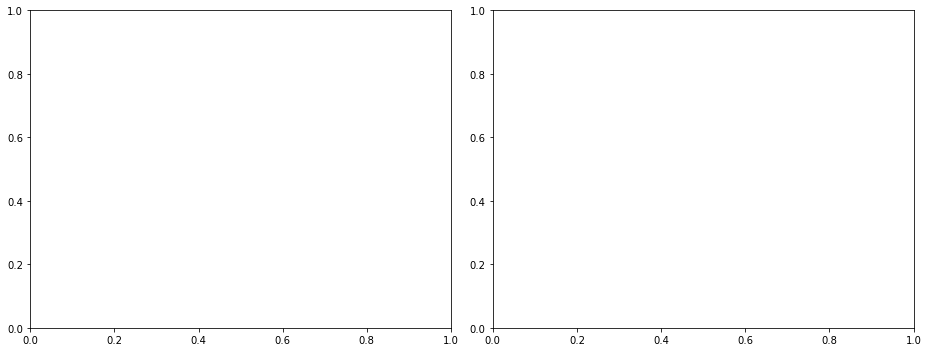

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [13, 5]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X, y)
ax1.plot(X, [h_theta(X[i], clf.intercept_, clf.coef_[0]) for i in range(0, 7)])
ax2.scatter(X, y)
ax2.plot(X, [h_theta(X[i], a[0], a[1]) for i in range(0, 7)])
plt.show()

In [35]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from LogisticRegression.Model import LogisticRegressionUsingGD
from sklearn.metrics import accuracy_score


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("data/marks.txt", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
                label='Not Admitted')

    # preparing the data for building the model

    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))

    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("The accuracy of the model is {}".format(accuracy))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    # plotting the decision boundary
    # As there are two features
    # wo + w1x1 + w2x2 = 0
    # x2 = - (wo + w1x1)/(w2)

    x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()

    # Using scikit-learn
    model = LogisticRegression()
    model.fit(X, y)
    parameters = model.coef_
    predicted_classes = model.predict(X)
    accuracy = accuracy_score(y.flatten(),predicted_classes)
    print('The accuracy score using scikit-learn is {}'.format(accuracy))
    print("The model parameters using scikit learn")
    print(parameters)

ModuleNotFoundError: No module named 'LogisticRegression'